# **PREPOSSECING**

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [151]:
#pemanggilan data
data = pd.read_csv("endometriosis.csv")

In [152]:
data.head()

,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI,Diagnosis
0,24,1,8.361531,0,0,19.451314,0
1,37,1,4.995508,0,0,22.388436,0
2,46,1,3.363996,1,0,21.320443,0
3,32,1,5.246037,0,0,20.177715,1
4,28,1,3.898932,1,0,23.538103,1


In [153]:
data.tail(5)

,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI,Diagnosis
9995,37,1,3.153169,1,0,18.318849,0
9996,44,0,4.044800,1,1,24.732344,0
9997,39,0,5.096384,1,1,34.204883,1
9998,47,1,7.598862,1,1,30.374964,1
9999,38,0,7.822210,0,0,26.385575,0


In [154]:
#melihat statistika deskriptif
data.describe()

,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI,Diagnosis
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,33.692300,0.697500,5.030619,0.591100,0.298300,23.052865,0.407900
std,9.205308,0.459364,1.983955,0.491655,0.457535,3.891615,0.491469
min,18.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000
25%,26.000000,0.000000,3.671697,0.000000,0.000000,20.329327,0.000000
50%,34.000000,1.000000,5.035825,1.000000,0.000000,23.036315,0.000000
75%,42.000000,1.000000,6.396854,1.000000,1.000000,25.712923,1.000000
max,49.000000,1.000000,10.000000,1.000000,1.000000,37.146127,1.000000


In [155]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        10000 non-null  int64  
 1   Menstrual_Irregularity     10000 non-null  int64  
 2   Chronic_Pain_Level         10000 non-null  float64
 3   Hormone_Level_Abnormality  10000 non-null  int64  
 4   Infertility                10000 non-null  int64  
 5   BMI                        10000 non-null  float64
 6   Diagnosis                  10000 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 547.0 KB


**CEK OUTLIER**
Cek Outlier Outlier dapat dideteksi menggunakan beberapa metode:

1. Boxplot → Visualisasi distribusi dan outlier
2. Interquartile Range (IQR) → Mengidentifikasi outlier berdasarkan distribusi kuartil

1. Boxplot

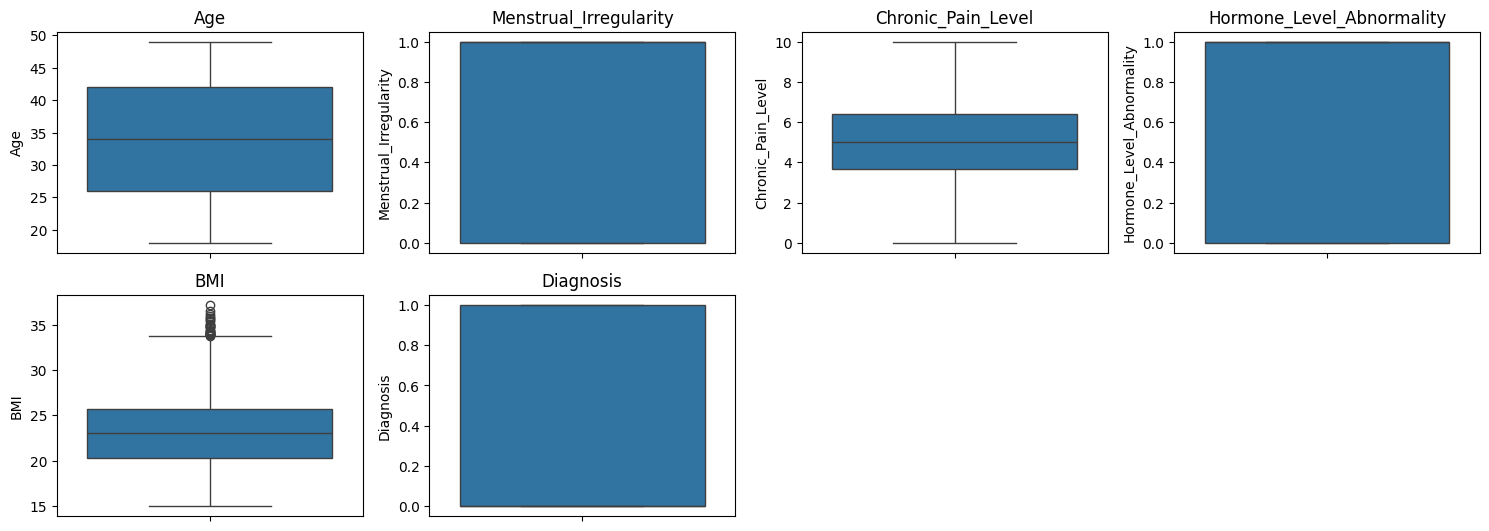

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['Age','Menstrual_Irregularity','Chronic_Pain_Level','Hormone_Level_Abnormality','BMI','Diagnosis']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

2. IQR

In [157]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile (0.25) #Kuartil 1
    Q3 = data[column].quantile (0.75) #Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

Age: 0 outliers
Menstrual_Irregularity: 0 outliers
Chronic_Pain_Level: 0 outliers
Hormone_Level_Abnormality: 0 outliers
BMI: 30 outliers
Diagnosis: 0 outliers


Berdasarkan hasil tersebut, ditemukan outlier pada kolom "BMI" sebanyak 30 outliers. Sehingga diperlukan penanganan outliers.Penanganan outlier pada kolom "BMI" digunakan Winsorizing (Mengganti Outlier dengan Batas IQR).

In [158]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

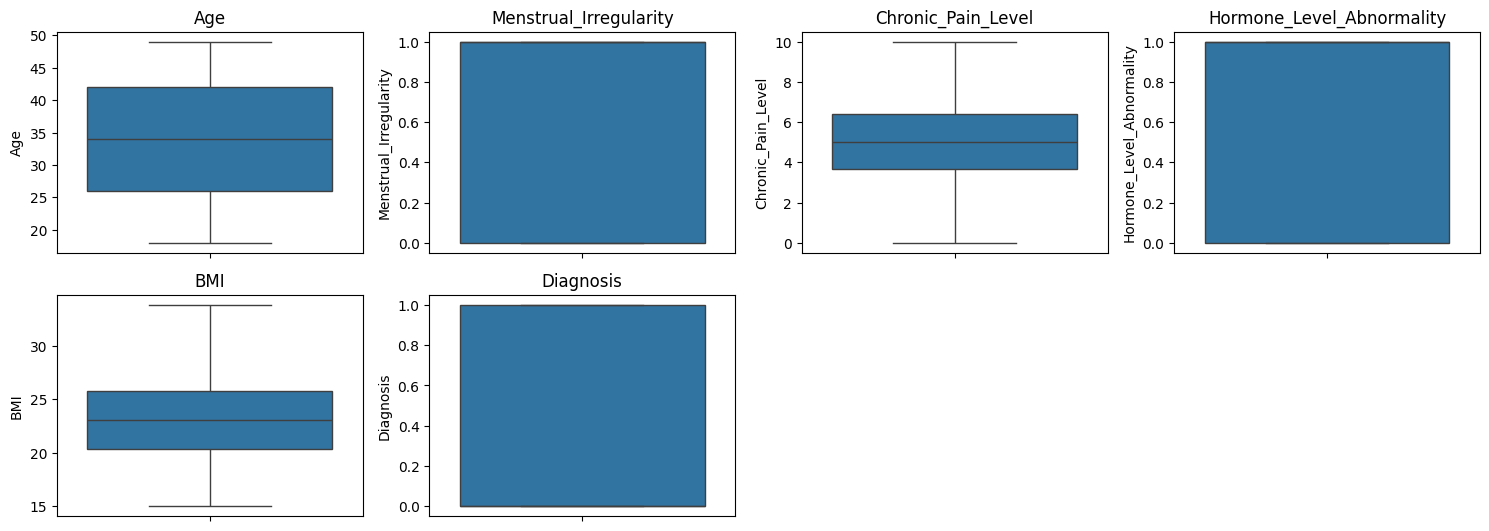

In [159]:
#cek boxplot lagi

num_cols = ['Age','Menstrual_Irregularity','Chronic_Pain_Level','Hormone_Level_Abnormality','BMI','Diagnosis']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Berdasarkan hasil di atas dapat dilihat bahwa data tidak memiliki outlier. Dengan demikian tidak perlu dilakukan penanganan outlier.

# **K-NEAREST NEIGHBORS**

**Splitting the dataset into the training set and test set**

Pembagian dataset menjadi data training dan data testing dilakukan untuk memisahkan data yang digunakan dalam dua tahap berbeda. Data training adalah bagian dari dataset yang dipakai untuk melatih model dalam proses pembelajaran mesin. Pada tahap ini, model mempelajari pola dan hubungan antara fitur (variabel independen) dengan label atau target (variabel dependen), sehingga model dapat menyesuaikan parameter internalnya agar mampu membuat prediksi yang tepat pada data baru.

Sementara itu, data testing merupakan bagian dataset yang digunakan untuk menguji performa model setelah proses pelatihan selesai. Data testing tidak digunakan selama pelatihan, melainkan berfungsi untuk menilai kemampuan model dalam menggeneralisasi dan memprediksi dengan akurat pada data yang belum pernah dilihat sebelumnya. Dengan demikian, data testing membantu memastikan bahwa model tidak hanya menghafal data latih, tetapi juga mampu mengenali pola umum yang berlaku pada data baru.

In [160]:
from sklearn.model_selection import train_test_split

X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 10000
Total # of sample in train dataset: 8000
Total # of sample in test dataset: 2000


In [162]:
print(X_train)

       Age  Menstrual_Irregularity  Chronic_Pain_Level  \
9254  34.0                     1.0            8.347381   
1561  21.0                     1.0            8.355368   
1670  23.0                     1.0            2.141347   
6087  26.0                     1.0            4.954645   
6669  23.0                     0.0            5.973239   
...    ...                     ...                 ...   
5734  43.0                     1.0            8.312645   
5191  25.0                     1.0            5.977040   
5390  45.0                     1.0            5.408001   
860   29.0                     1.0            0.079128   
7270  43.0                     1.0            7.720590   

      Hormone_Level_Abnormality  Infertility        BMI  
9254                        1.0            0  26.450822  
1561                        1.0            1  24.528480  
1670                        1.0            0  25.289643  
6087                        0.0            0  16.767964  
6669         

In [163]:
print(y_train)

9254    1.0
1561    1.0
1670    0.0
6087    0.0
6669    1.0
       ... 
5734    1.0
5191    0.0
5390    0.0
860     1.0
7270    1.0
Name: Diagnosis, Length: 8000, dtype: float64


In [164]:
print(X_test)

       Age  Menstrual_Irregularity  Chronic_Pain_Level  \
6252  28.0                     1.0            2.303931   
4684  43.0                     1.0            2.748098   
1731  36.0                     0.0            3.592687   
4742  45.0                     1.0            6.280112   
4521  32.0                     1.0            5.704050   
...    ...                     ...                 ...   
6412  40.0                     0.0            4.277071   
8285  34.0                     1.0            5.313937   
7853  29.0                     1.0            9.234746   
1095  43.0                     1.0            5.810480   
6929  25.0                     0.0            1.691929   

      Hormone_Level_Abnormality  Infertility        BMI  
6252                        1.0            1  19.128951  
4684                        1.0            0  24.036195  
1731                        1.0            0  25.939358  
4742                        0.0            0  17.421034  
4521         

In [165]:
print(y_test)

6252    0.0
4684    0.0
1731    1.0
4742    1.0
4521    0.0
       ... 
6412    0.0
8285    0.0
7853    0.0
1095    0.0
6929    0.0
Name: Diagnosis, Length: 2000, dtype: float64


**Feature Scaling**

Transformasi data dan Normalisasi data perlu dilakukan agar data dapat digunakan dalam algoritma KNN maupun Naive Bayes

In [166]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [167]:
print(X_train)

[[ 0.03211384  0.65874785  1.66322082  0.82331789 -0.65095382  0.87753112]
 [-1.37413421  0.65874785  1.66723355  0.82331789  1.53620728  0.3845048 ]
 [-1.15778836  0.65874785 -1.45482391  0.82331789 -0.65095382  0.57972161]
 ...
 [ 1.22201603  0.65874785  0.18641296  0.82331789 -0.65095382  0.43751169]
 [-0.5087508   0.65874785 -2.4909268   0.82331789 -0.65095382 -1.7933321 ]
 [ 1.00567018  0.65874785  1.34830737  0.82331789 -0.65095382  1.02979838]]


In [168]:
print(X_test.dtype)

float64


**Training the K-NN model on the Training set**

In [169]:
from math import sqrt
class KNN():
  def __init__(self,k):
    self.k=k
    print(self.k)
  def fit(self,X_train,y_train):
    self.x_train=X_train
    self.y_train=y_train
  def calculate_euclidean(self,sample1,sample2):
    distance=0.0
    for i in range(len(sample1)):
      distance+=(sample1[i]-sample2[i])**2 #Euclidean Distance = sqrt(sum i to N (x1_i-x2_i)^2)
    return sqrt(distance)
  def nearest_neighbors(self,test_sample):
    distances=[] #calculate distances from a test sample to every sample in a training set
    for i in range(len(self.x_train)):
      distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
    distances.sort(key=lambda x:x[1]) #sort in ascending order, based on a distance value
    neighbors=[]
    for i in range(self.k): #get fist k samples
      neighbors.append(distances[i][0])
    return neighbors
  def predict(self,test_set):
    predictions=[]
    for test_sample in test_set:
      neigbors=self.nearest_neighbors(test_sample)
      labels=[sample for sample in neighbors]
      prediction=max(labels,key=labels.count)
      predictions.append(prediction)
    return predictions

In [170]:
model=KNN(100)
model.fit(X_train,y_train)

100


In [171]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) #The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [172]:
model = []
model.append(('KNN', KNeighborsClassifier()))

**Prediksi KNN berdasarkan model yang dibangun:**

Modelling dengan KNN

In [173]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#definisikan nilai K dan buat objek KNN regressor
k = 3
knn = KNeighborsRegressor(n_neighbors=k)

#fitkan model KNN ke data train
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [174]:
# Lakukan prediksi pada data train dan dataset
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [175]:
#Hitung MSE untuk data train dan data test
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

In [176]:
print("MSE data train:", mse_train)
print("MSE data test:", mse_test)

MSE data train: 0.14898611111111115
MSE data test: 0.28861111111111115


Hasil Prediksi berdasarkan perhitungan Mean Squared Error:

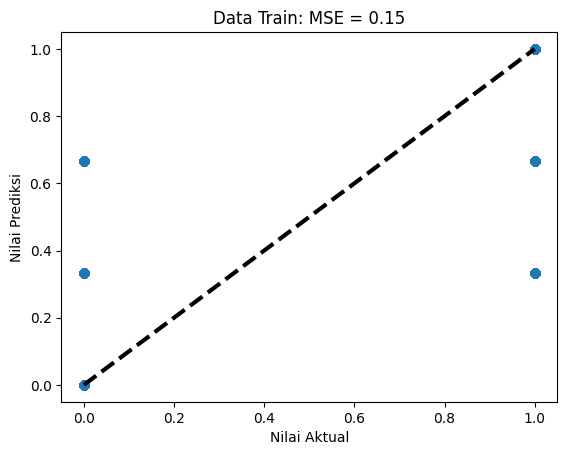

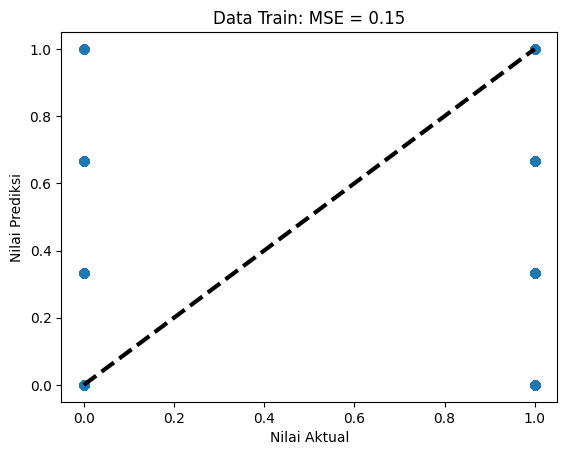

In [177]:
import matplotlib.pyplot as plt

# Plot data train
plt.scatter(y_train, y_pred_train)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=3)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Data Train: MSE = %.2f' % mse_train)
plt.show()

# Plot dataset
plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Data Train: MSE = %.2f' % mse_train)
plt.show()

Kita akan menggunakan matplotlib untuk membuat scatter plot dari nilai aktual versus nilai prediksi untuk data train dan data test. Garis diagonal yang ditampilkan pada grafik menggambarkan situasi ideal di mana nilai aktual dan prediksi sama. Jika model KNN berhasil memprediksi dengan baik, titik akan membentuk pola yang hampil lurus mengikuti garis diagonal. Jika nilai MSE rendah, artinya model memiliki tingkat akurasi yang baik

**Hasil evaluasi (nilai akurasi Algoritma KNN) dan Confusion Matriks**

In [178]:
y_pred = classifier.predict(X_test)

In [179]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[865 355]
 [451 329]]


0.597

Nilai akurasi algoritma KNN adalah 59,7%



# **NAIVE BAYES**

In [181]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [182]:
# fit train set pakai Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [183]:
# compute the accuracy of train set
nb.score(X_train, y_train)

0.622875

In [184]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [185]:
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.6395


**Membuat model dengan Neural Network**

In [186]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)



# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Lakukan pencarian grid pada data training
grid_search.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

In [187]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (50, 30), 'learning_rate_init': 0.01, 'max_iter': 100}


In [188]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,),learning_rate_init=0.1,max_iter=100)

clf.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100)

In [189]:
y_pred = clf.predict(X_test)

In [190]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.85      0.74      1220
         1.0       0.56      0.31      0.40       780

    accuracy                           0.64      2000
   macro avg       0.61      0.58      0.57      2000
weighted avg       0.62      0.64      0.61      2000



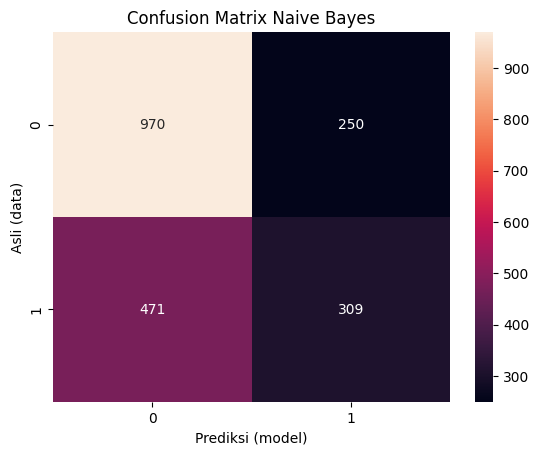

In [193]:
# Visualisasi Confusion Matrix
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_predict['NB'] are your true and predicted labels for Naive Bayes
cm_nb = confusion_matrix(y_test, y_predict['NB'])  # Calculate the confusion matrix

sns.heatmap(cm_nb, annot=True, fmt='d', cmap='rocket')
plt.xlabel('Prediksi (model)')
plt.ylabel('Asli (data)')
plt.title('Confusion Matrix Naive Bayes')
plt.show()

In [191]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.637

Output 0.637 yang dihasilkan dari accuracy_score menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Dalam konteks ini, angka 0.637 berarti bahwa model berhasil memprediksi dengan benar sekitar 63,7% dari semua sampel pada data uji (y_test) yang telah digunakan. Hasil ini melebihi akurasi yang ditunjukkan dengan menggunakan KNN yaitu 59,7%. Dengan demikian dalam kasus ini klasifikasi dengan menggunakan Naive Bayes lebih akurat daripada menggunakan KNN.

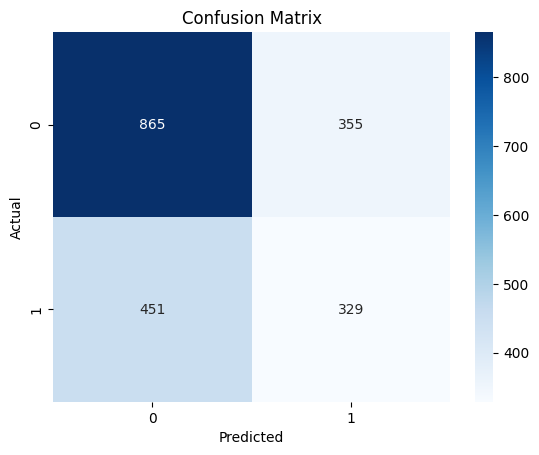

In [194]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()